Analysis:

1. Our dataset shows people are high likely to get hypertension than heart disease. 

2. Percentage of people who has hypertesnion got stroke is higher than percentage of people who doesn't have hypertension got stroke. Percentage of people who has heart disease got stroke is higher than percentage of people who doesn't have heart disease got stroke.

3. It's not necessarily mean that people who has hypertension/heart disease will definetly have a stroke. There can be other factors which can cause a stroke in people. But there is high likely chance that people with hypertension and heart disease will be at the biggest risk of having a stroke.

4. Hypertesnion is the biggest risk factor for stroke. People with hypertension who got stroke is higher than people with heart disease who had stroke. People with hypertension had stroke is 62.8% and people with heart disease had a stroke is 37.2%.

In [509]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path
import seaborn as sns

file = Path("Resources\Clean_Stroke_Data.csv")

stroke_df = pd.read_csv(file)
stroke_df.head()

,ID,Gender,Age,Hypertension,Heart Disease,Residence Type,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,Urban,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Rural,32.5,never smoked,1
3,60182,Female,49.0,0,0,Urban,34.4,smokes,1
4,1665,Female,79.0,1,0,Rural,24.0,never smoked,1
5,56669,Male,81.0,0,0,Urban,29.0,formerly smoked,1


In [510]:
#Total number of people who had stroke
total_stroke_df = stroke_df.loc[stroke_df["Stroke"] == 1]
total_strokes = len(total_stroke_df)

#Total number of people who had no stroke
total_no_stroke_df = stroke_df.loc[stroke_df["Stroke"] == 0]
total_no_strokes = len(total_no_stroke_df)

print(f"Out of {len(stroke_df)} people, {total_strokes} people had stroke and {total_no_strokes} people had no stroke")

Out of 4909 people, 209 people had stroke and 4700 people had no stroke


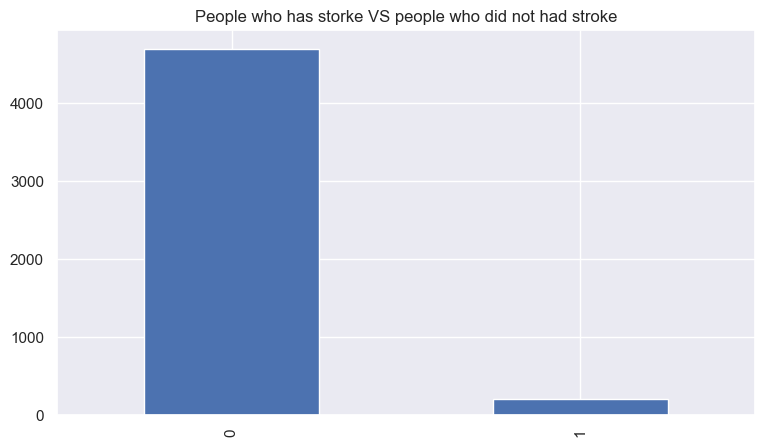

In [526]:
#Bar graph showing people who had stroke vs people had no stroke
stroke_df['Stroke'].value_counts().plot(kind='bar', title="People who has storke VS people who had no stroke")
plt.show()

In [512]:
def create_category(row):
    if (row["Stroke"] ==0) & (row["Hypertension"] ==0) & (row["Heart Disease"]==0):
        return "No Stroke, No Hypertension, No Heart Disease"
    elif (row["Stroke"] ==0) & (row["Hypertension"] ==0) & (row["Heart Disease"]==1):
        return "No Stroke, No Hypertension, Heart Disease"
    elif (row["Stroke"] ==0) & (row["Hypertension"] ==1) & (row["Heart Disease"]==0):
        return "No Stroke, Hypertension, No Heart Disease"
    elif (row["Stroke"] ==0) & (row["Hypertension"] ==1) & (row["Heart Disease"]==1):
        return "No Stroke, Hypertension, Heart Disease"
    elif (row["Stroke"] ==1) & (row["Hypertension"] ==0) & (row["Heart Disease"]==0):
        return "Stroke, No Hypertension, No Heart Disease"  
    elif (row["Stroke"] ==1) & (row["Hypertension"] ==0) & (row["Heart Disease"]==1):
        return "Stroke, No Hypertension, Heart Disease"
    elif (row["Stroke"] ==1) & (row["Hypertension"] ==1) & (row["Heart Disease"]==0):
        return "Stroke, Hypertension, No Heart Disease"
    elif (row["Stroke"] ==1) & (row["Hypertension"] ==1) & (row["Heart Disease"]==1):
        return "Stroke, Hypertension, Heart Disease"
    return "unknown"

stroke_df["Category"] = stroke_df.apply(create_category, axis=1)
stroke_df.head()

,ID,Gender,Age,Hypertension,Heart Disease,Residence Type,BMI,Smoking Status,Stroke,Category
0,9046,Male,67.0,0,1,Urban,36.6,formerly smoked,1,"Stroke, No Hypertension, Heart Disease"
2,31112,Male,80.0,0,1,Rural,32.5,never smoked,1,"Stroke, No Hypertension, Heart Disease"
3,60182,Female,49.0,0,0,Urban,34.4,smokes,1,"Stroke, No Hypertension, No Heart Disease"
4,1665,Female,79.0,1,0,Rural,24.0,never smoked,1,"Stroke, Hypertension, No Heart Disease"
5,56669,Male,81.0,0,0,Urban,29.0,formerly smoked,1,"Stroke, No Hypertension, No Heart Disease"


Stroke  Hypertension  Heart Disease  Category                                    
0       0             0              No Stroke, No Hypertension, No Heart Disease    153876188
                      1              No Stroke, No Hypertension, Heart Disease         5610872
        1             0              No Stroke, Hypertension, No Heart Disease        12719896
                      1              No Stroke, Hypertension, Heart Disease            1894637
1       0             0              Stroke, No Hypertension, No Heart Disease         4590750
                      1              Stroke, No Hypertension, Heart Disease            1120754
        1             0              Stroke, Hypertension, No Heart Disease            1665485
                      1              Stroke, Hypertension, Heart Disease                470133
Name: ID, dtype: int64

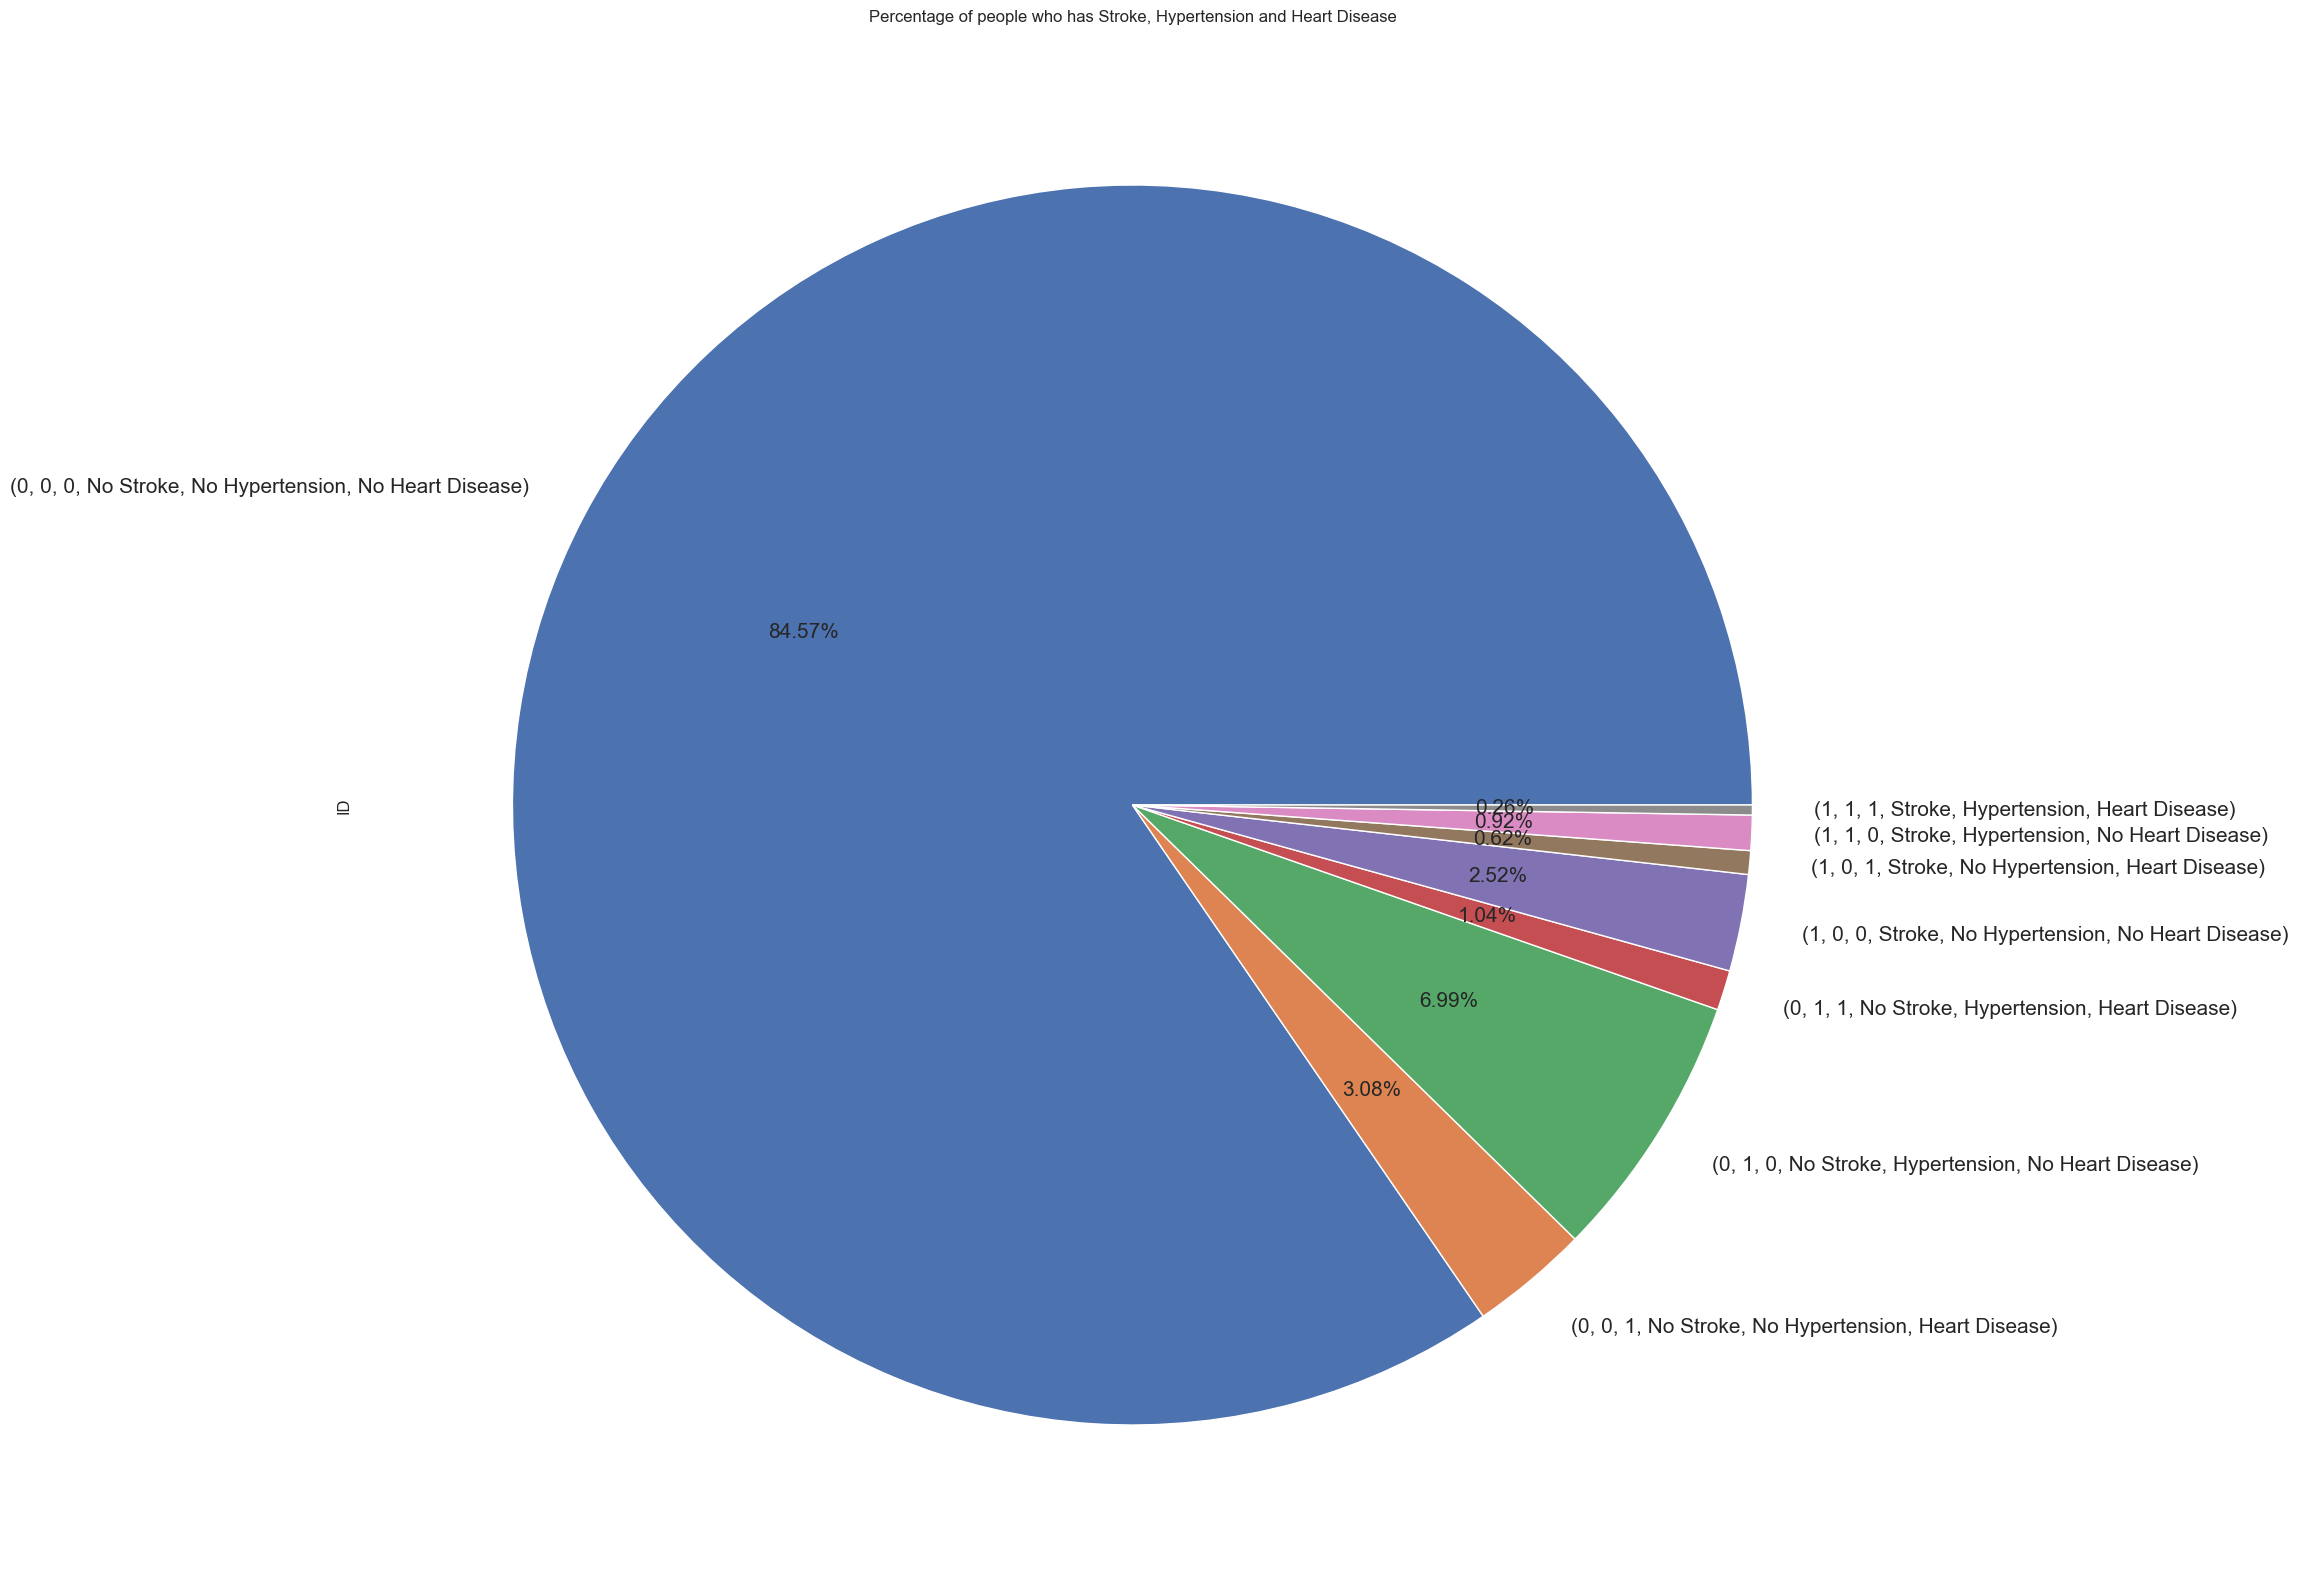

In [528]:
#Pie Chart to illustrate people who has Hypertesnion, heart Disease and Stroke
ax = (stroke_df.groupby(["Stroke","Hypertension","Heart Disease", "Category"])['ID'].sum()
        .plot.pie(figsize=(20,24), fontsize="15", autopct='%.2f%%', title="Percentage of people who has Stroke, Hypertension and Heart Disease")
     )
a = stroke_df.groupby(["Stroke","Hypertension", "Heart Disease", "Category"])['ID'].sum()
a

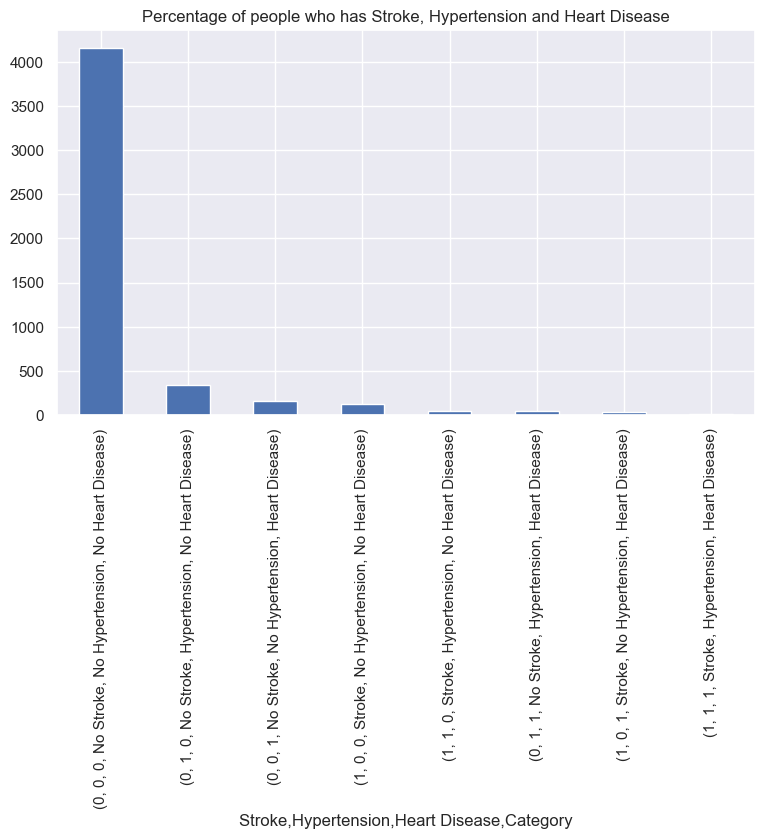

In [525]:
#Bar graph to illustrat the people who has Hypertesnion, heart Disease and Stroke
hypertension_heartdisease = stroke_df[["Stroke","Hypertension","Heart Disease","Category"]].value_counts()   
hypertension_heartdisease.plot(kind='bar')
plt.title("Percentage of people who has Stroke, Hypertension and Heart Disease")
plt.show()

In [515]:
# People with hypertension who had a stroke
hypertension_stroke_df = stroke_df.loc[(stroke_df["Hypertension"] == 1) & (stroke_df["Stroke"]== 1)]

# People with hypertension who had no stroke
hypertension_without_stroke_df = stroke_df.loc[(stroke_df["Hypertension"] == 1) & (stroke_df["Stroke"]== 0)]

#People who has hypertension
hypertension_df = stroke_df.loc[(stroke_df["Hypertension"] == 1)]

# Percnetage of people with hypertension who had a stroke
percentage_hypertension_stroke = (100 *(len(hypertension_stroke_df)/(len(hypertension_df))))

# Percnetage of people with hypertension who had no stroke
percentage_hypertension_without_stroke = (100 *(len(hypertension_without_stroke_df)/(len(hypertension_df))))


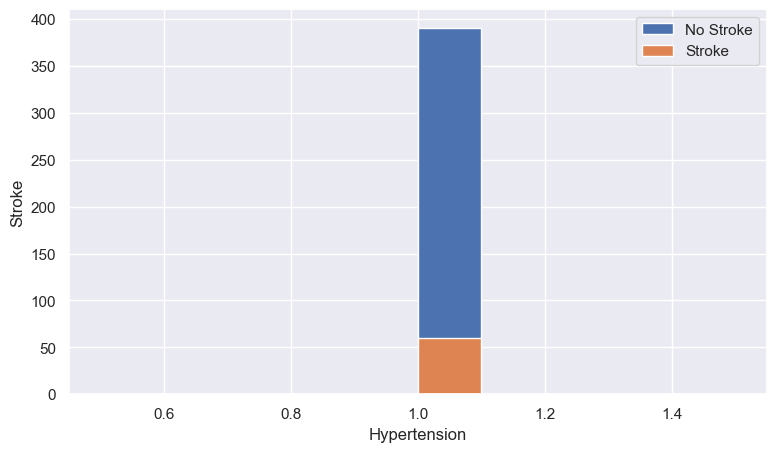

In [516]:
#Histogram chart for showing people with hypertension who had a stroke VS People with hypertension who had no stroke
stroke_df.loc[(stroke_df['Stroke'] == 0) & (stroke_df["Hypertension"]==1),'Hypertension'].hist(label='No Stroke')
stroke_df.loc[(stroke_df['Stroke'] == 1) & (stroke_df["Hypertension"]==1),'Hypertension'].hist(label='Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Stroke')
plt.legend()

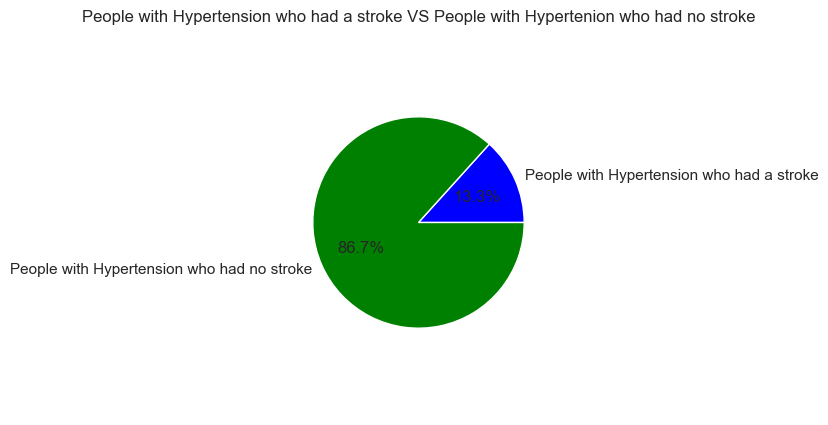

In [517]:
# Pie chart for showing percentage of people with Hypertension who had a stroke VS people with Hypertension who had no stroke
labels=["People with Hypertension who had a stroke", "People with Hypertension who had no stroke"]
sizes = [percentage_hypertension_stroke, percentage_hypertension_without_stroke]
colors=["blue", "green"]
fig1, ax1 = plt.subplots(figsize=(3, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("People with Hypertension who had a stroke VS People with Hypertenion who had no stroke")
plt.axis("equal")
plt.show()

In [518]:
# People with heart disease who had a stroke
heartdisease_stroke_df = stroke_df.loc[(stroke_df["Heart Disease"] == 1)  & (stroke_df["Stroke"]== 1)]

# People with heart disease who had no stroke
heartdisease_without_stroke_df = stroke_df.loc[(stroke_df["Heart Disease"] == 1)  & (stroke_df["Stroke"]== 0)]

# People with heart disease
heartdisease_df = stroke_df.loc[(stroke_df["Heart Disease"] ==1)]

# Percnetage of people with heart disease who had a stroke
percentage_heartdisease_stroke = (100 *(len(heartdisease_stroke_df)/(len(heartdisease_df))))

# Percnetage of people with heart disease who had no stroke
percentage_heartdisease_without_stroke = (100 *(len(heartdisease_without_stroke_df)/(len(heartdisease_df))))

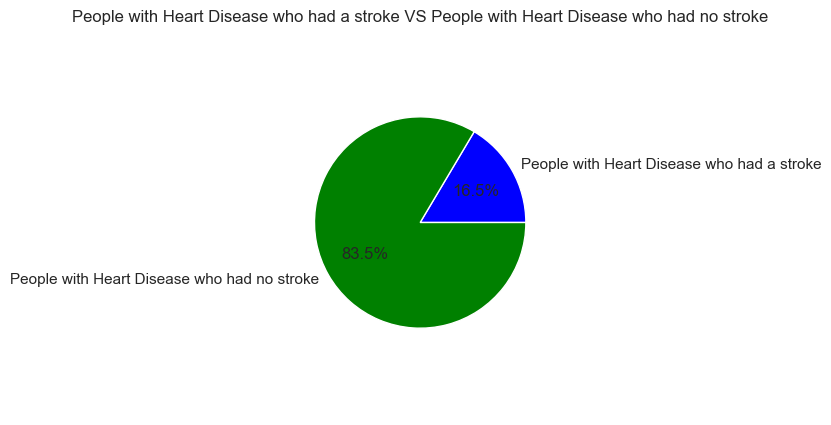

In [519]:
# Generate a pie chart showing percentage of people with Heart Disease who had a stroke VS people with Heart Disease who had no stroke
labels=["People with Heart Disease who had a stroke", "People with Heart Disease who had no stroke"]
sizes = [percentage_heartdisease_stroke, percentage_heartdisease_without_stroke]
colors=["blue", "green"]
fig1, ax1 = plt.subplots(figsize=(3, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("People with Heart Disease who had a stroke VS People with Heart Disease who had no stroke")
plt.axis("equal")
plt.show()

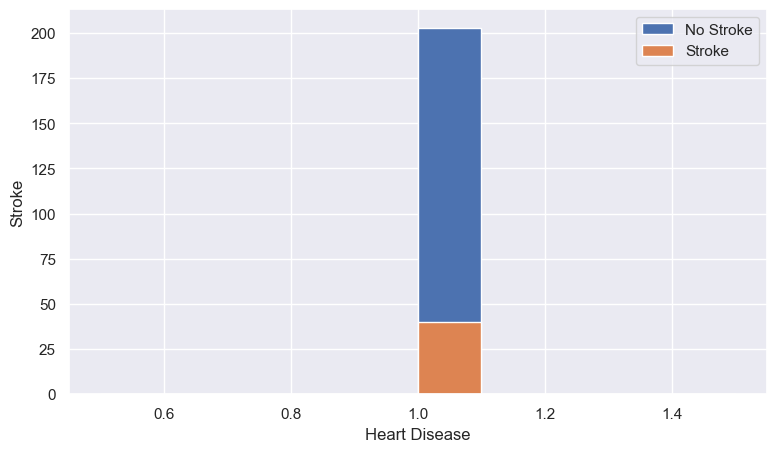

In [520]:
#chart showing people with heart disease who had a stroke VS People with heart disease who had no stroke
stroke_df.loc[(stroke_df['Stroke'] == 0) & (stroke_df["Heart Disease"]==1),'Heart Disease'].hist(label='No Stroke')
stroke_df.loc[(stroke_df['Stroke'] == 1) & (stroke_df["Heart Disease"]==1),'Heart Disease'].hist(label='Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Stroke')
plt.legend()

In [521]:
# People with hypertension who had a stroke
hypertension_stroke_df = stroke_df.loc[(stroke_df["Hypertension"] == 1) & (stroke_df["Heart Disease"]== 0) & (stroke_df["Stroke"]== 1)]

# People with heart disease who had a stroke
heartdisease_stroke_df = stroke_df.loc[(stroke_df["Heart Disease"] == 1) & (stroke_df["Hypertension"]== 0) & (stroke_df["Stroke"]== 1)]

# Percnetage of people with hypertension who had a stroke
hypertension_stroke = (100 *(len(hypertension_stroke_df)/(len(heartdisease_stroke_df+hypertension_stroke_df))))

# Percnetage of people with heart disease who had a stroke
heartdisease_stroke = (100 *(len(heartdisease_stroke_df)/(len(heartdisease_stroke_df+hypertension_stroke_df))))

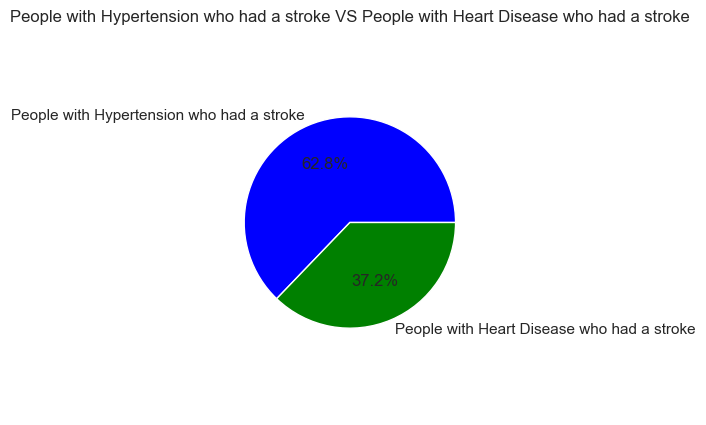

In [522]:
# Generate a pie chart showing percentage of people with Hypertension who had a stroke VS people with Heart Disease who had a stroke
labels=["People with Hypertension who had a stroke", "People with Heart Disease who had a stroke"]
sizes = [hypertension_stroke, heartdisease_stroke]
colors=["blue", "green"]
fig1, ax1 = plt.subplots(figsize=(3, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("People with Hypertension who had a stroke VS People with Heart Disease who had a stroke")
plt.axis("equal")
plt.show()